In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from itertools import count
from tqdm import tqdm
import time
import torch 

In [2]:
def labeling(x, y):
    if x <= 0.5:
        if y >= 0.5: 
            return 1
        else : 
            return 0
    else : 
        if y < 0.5:
            return 1
        else : 
            return 0

In [3]:
dataset = []

In [4]:
for i in range(1000):
    x, y = np.random.rand(), np.random.rand()
    data = np.array((x, y, labeling(x, y)))
    dataset.append(data)

In [5]:
dataset = np.array(dataset)

In [6]:
dataset.shape

(1000, 3)

In [7]:
dataset[:5]

array([[0.52883933, 0.10076882, 1.        ],
       [0.94964673, 0.84509066, 0.        ],
       [0.68805378, 0.86651334, 0.        ],
       [0.92229483, 0.6314384 , 0.        ],
       [0.30448445, 0.48218993, 0.        ]])

# Plot

In [8]:
# data label 1 
label1 = np.array([ data for data in dataset if data[2] == 1])
label1[:5]

array([[0.52883933, 0.10076882, 1.        ],
       [0.48665136, 0.90520004, 1.        ],
       [0.4347492 , 0.72532458, 1.        ],
       [0.79371144, 0.16042805, 1.        ],
       [0.77262418, 0.13372272, 1.        ]])

In [9]:
# data label 0
label0 = np.array([ data for data in dataset if data[2] == 0])
label0[:5]

array([[0.94964673, 0.84509066, 0.        ],
       [0.68805378, 0.86651334, 0.        ],
       [0.92229483, 0.6314384 , 0.        ],
       [0.30448445, 0.48218993, 0.        ],
       [0.66524387, 0.53331321, 0.        ]])

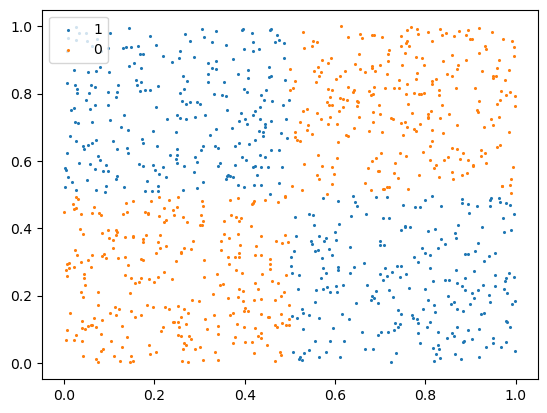

In [10]:
plt.scatter(label1[:, 0], label1[:, 1], s=1.5);
plt.scatter(label0[:, 0], label0[:, 1], s=1.5);
plt.legend([1, 0])

In [11]:
len(label0), len(label1)

(523, 477)

# Modeling

In [12]:
from torch import nn, optim 

In [30]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 300), 
            nn.Tanh(),
            nn.Linear(300, 2), 
            nn.Tanh(),
            nn.Linear(2, 2), 
            nn.Tanh(),
            nn.Linear(2, 2), 
            nn.Tanh(),
            nn.Linear(2, 1), 
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.fc(x)

In [31]:
model = Model()

In [32]:
error = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Loop Train

In [33]:
def loop_fn():
    cost = 0
    for data in ((dataset)) :
        source, target = torch.Tensor([data[:-1]]), torch.Tensor([[data[-1]]])
        
        output = model(source)
        loss = error(output, target)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        cost += loss.item()
        total_loss.append(loss.item())
        # pbar.set_postfix({
        #     'loss' : loss[0, 0]
        # })
        # time.sleep(0.1)

    cost = cost / len(dataset)
    # print(f"Total Cost: {cost}")
    return cost

In [34]:
total_cost = []
total_loss = []

In [35]:
for _ in (pbar := tqdm(range(100))):
    cost = loop_fn()
    total_cost.append(cost)
    pbar.set_postfix({
        'cost' : cost
    })

100%|████████████████████████████████████████████████████████████████████| 100/100 [02:44<00:00,  1.65s/it, cost=0.368]


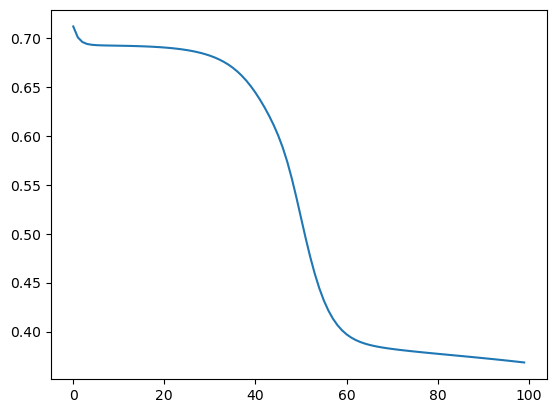

In [36]:
plt.plot(total_cost);

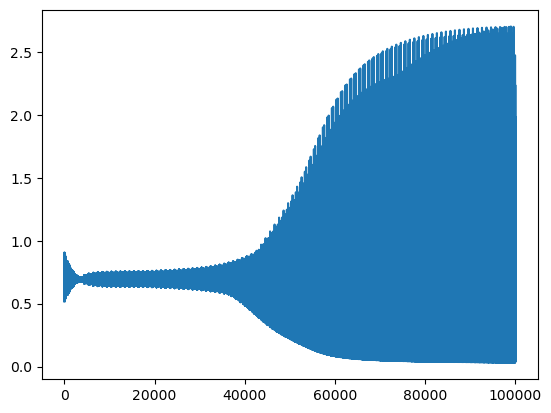

In [37]:
plt.plot(total_loss);

# Apa yang disimpulkan model

In [38]:
data = []

In [39]:
for i in range(10000):
    x, y = np.random.rand(), np.random.rand()
    data.append(np.array([x, y]))

In [40]:
data = torch.Tensor(data)

In [41]:
label = (model(data) > 0.5) * 1.0

In [42]:
data.shape, label.shape

(torch.Size([10000, 2]), torch.Size([10000, 1]))

In [43]:
data_ = np.stack((data[:, 0], data[:, 1], label[:, 0])).T

In [44]:
# data label1 
label1 = np.array([ x for x in data_ if x[2] == 1 ])
label1.shape

(4569, 3)

In [45]:
# data label 0 
label0 = np.array([ x for x in data_ if x[2] == 0 ])
label0.shape

(5431, 3)

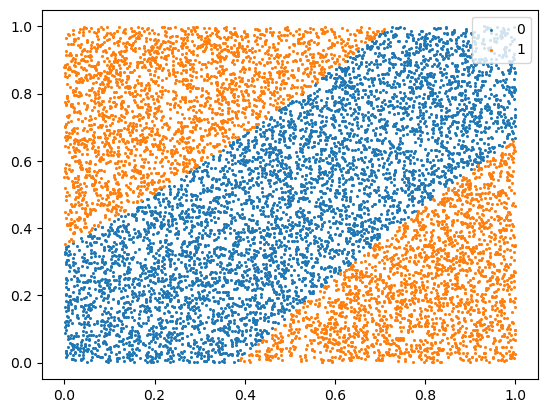

In [46]:
plt.scatter(label0[:, 0], label0[:, 1], s=1.5);
plt.scatter(label1[:, 0], label1[:, 1], s=1.5)
plt.legend([0, 1]);